In [227]:
import requests
import time
from bs4 import BeautifulSoup
import os
import glob
from datetime import datetime
from dateutil.parser import parse
from selenium.webdriver.common.action_chains import ActionChains
from langdetect import detect
import random
import cv2

In [6]:
photo_file_array = ['https://github.com/guga31bb/nflfastR-data/blob/master/data/']

In [8]:
al_author_urls = ['https://www.goodreads.com/author/quotes/38041.Samuel_P_Huntington',
              'https://www.goodreads.com/author/quotes/88483.Oswald_Spengler',
              'https://www.goodreads.com/author/quotes/52705.Huey_P_Newton',
              'https://www.goodreads.com/author/quotes/5863103.Angela_Y_Davis',
              'https://www.goodreads.com/author/quotes/150737.Max_Stirner',
              'https://www.goodreads.com/author/quotes/34296.Pyotr_Kropotkin',
              'https://www.goodreads.com/author/quotes/15591.Emma_Goldman',
              'https://www.goodreads.com/author/quotes/252868.Errico_Malatesta',
                 'https://www.goodreads.com/author/quotes/29110.Alexander_Berkman',
                 'https://www.goodreads.com/author/quotes/34299.Murray_Bookchin',
                 'https://www.goodreads.com/author/quotes/28903.Rudolf_Rocker',
                 'https://www.goodreads.com/author/quotes/25616.Rosa_Luxemburg',
                 'https://www.goodreads.com/author/quotes/217414.Peter_Gelderloos',
                 'https://www.goodreads.com/author/quotes/2900919.Friedrich_Engels',
                 'https://www.goodreads.com/author/quotes/29101.David_Graeber',
                 'https://www.goodreads.com/author/quotes/11958.James_C_Scott',
                 'https://www.goodreads.com/author/quotes/16498.Morris_Berman',
                 'https://www.goodreads.com/author/quotes/5790.Niall_Ferguson',
                 'https://www.goodreads.com/author/quotes/15438.Chris_Hedges',
                 'https://www.goodreads.com/author/quotes/11298762.Alex_S_Vitale',
                 'https://www.goodreads.com/author/show/2476.Noam_Chomsky']

In [9]:
quotes_dict = {}

In [10]:
def add_to_quotes(author_url):
    page = requests.get(author_url)
    soup = BeautifulSoup(page.content,'html.parser')
    quotes = soup.find_all("div", {"class": "quoteText"})
    links = soup.find_all('a')
    quotes_dict[author_url[author_url.rfind('.')+1:]] = [quote.text[8:str(quote.text).rfind('”')] for quote in quotes if detect(quote.text) == 'en' and len(quote.text)<250]
    
    return quotes_dict

In [13]:
for each in al_author_urls:
    add_to_quotes(each)

In [15]:
from PIL import Image, ImageFont, ImageDraw 

In [16]:
def find_indeces_of_spaces(string):
    return [i for i, ltr in enumerate(string) if ltr == " "]

In [228]:
def greater_than_less_than(one, two, num):
    return one < num and two > num

In [224]:
def pair_image_w_text(photo_file_name):
    author = random.choice(list(quotes_dict.keys()))
    quote = random.choice(quotes_dict[author])
    space_indeces = find_indeces_of_spaces(quote)
    
    numbers_to_break_on = []
    for each in [52, 108, 108 + 54, 108 + 54 + 54]:
        x = 0
        while x < len(space_indeces) - 1:
            if greater_than_less_than(space_indeces[x], space_indeces[x + 1], each):
                numbers_to_break_on.append(space_indeces[x])
            elif space_indeces[x] == each:
                numbers_to_break_on.append(space_indeces[x])
            x += 1
    
    my_image = Image.open(photo_file_name)
    title_font = ImageFont.truetype('09809_COURIER.ttf', 75)
    image_editable = ImageDraw.Draw(my_image)

    if len(numbers_to_break_on) == 2:
        divided_quote = (quote[:numbers_to_break_on[0]] + '\n' + quote[numbers_to_break_on[0]:numbers_to_break_on[1]]
                         + '\n' + quote[numbers_to_break_on[1]:])
    elif len(numbers_to_break_on) == 3:
        divided_quote = (quote[:numbers_to_break_on[0]] + '\n' + quote[numbers_to_break_on[0]:numbers_to_break_on[1]]
                         + '\n' + quote[numbers_to_break_on[1]:numbers_to_break_on[2]] + '\n' +
                        quote[numbers_to_break_on[2]:])
    elif len(numbers_to_break_on) == 1:
        divided_quote = quote[:numbers_to_break_on[0]] + '\n' + quote[numbers_to_break_on[0]:]
    else:
        divided_quote = quote
    
    
    
    image_editable.text((75,1250), divided_quote, (255, 255, 255), font=title_font)
#     my_image.save(author + '.png')
    return my_image

Errico_Malatesta
96
[2, 13, 16, 20, 25, 28, 39, 43, 51, 54, 59, 63, 70, 73, 84]
[51]


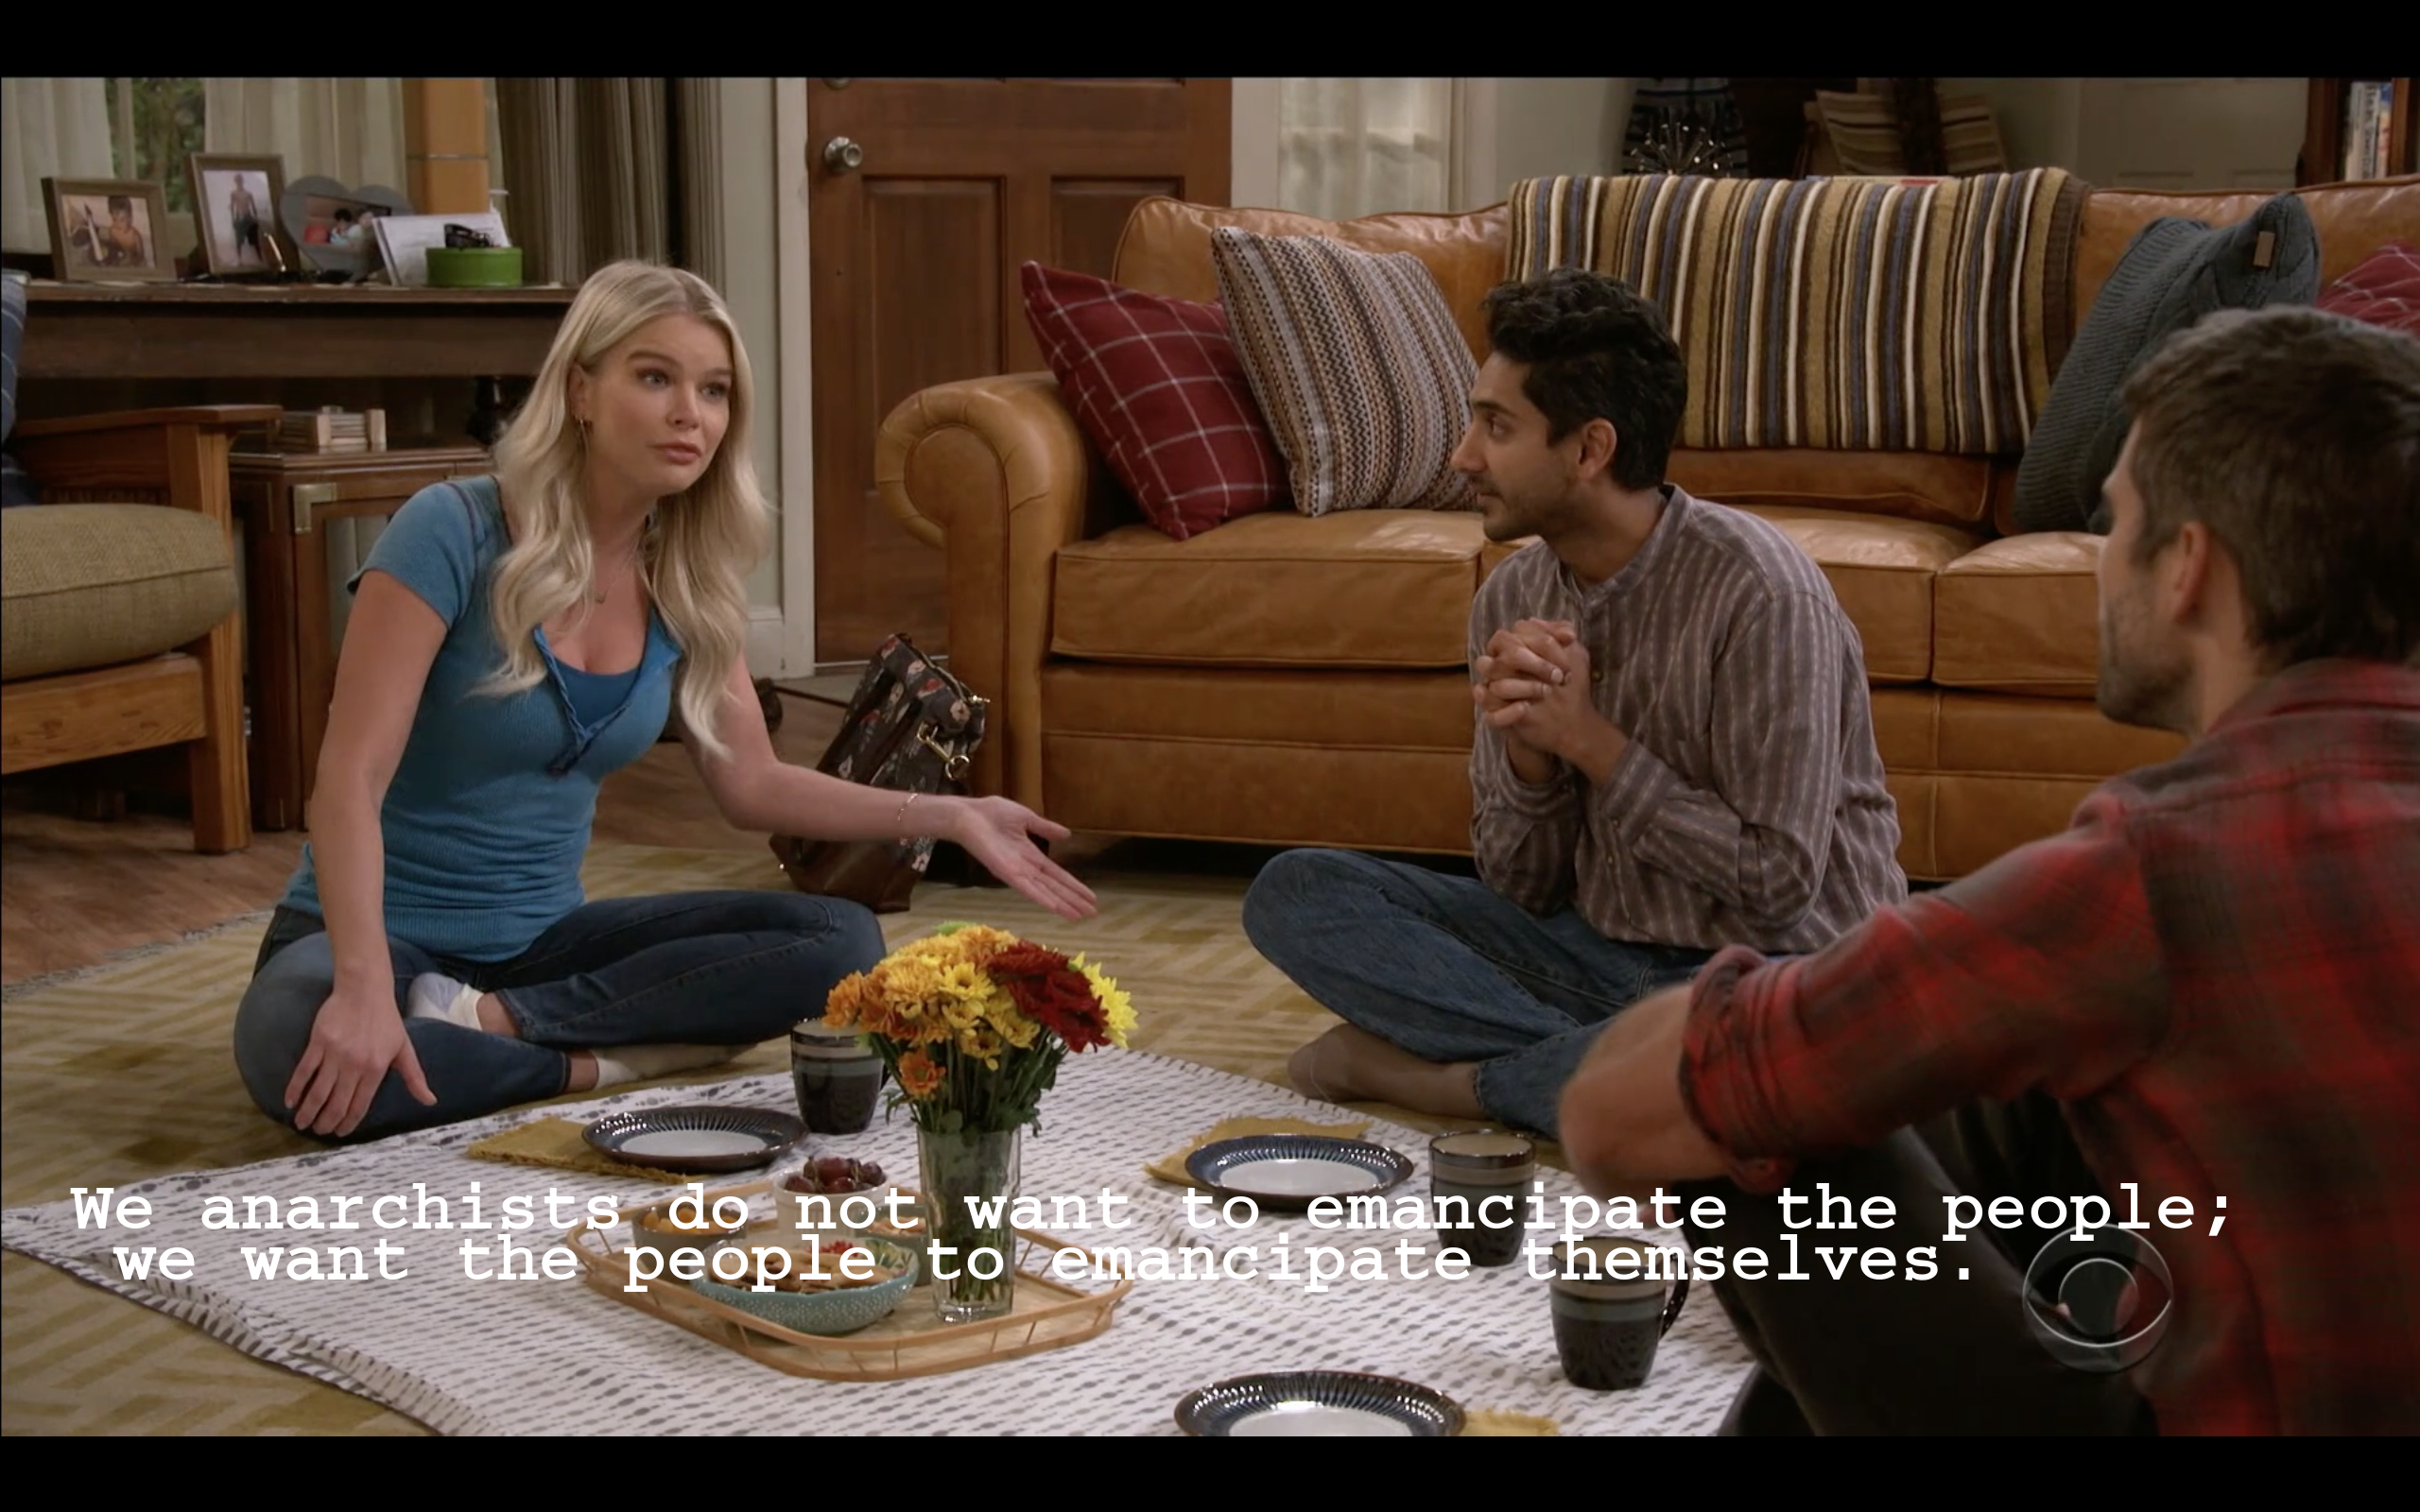

In [226]:
pair_image_w_text(random.choice(photo_file_array))

In [142]:
sample = [2, 9, 15, 18, 22, 26, 35, 43, 48, 62, 65, 70, 79, 87, 90, 93, 99, 106, 114, 118, 125, 128, 132]



[48, 106]